## CHEME 6880 Homework 1 
Net ID : AF626

### Problem 1 
Consider the data set below (data_1). Please apply kernel density estimation to plot the estimated densities
for the following cases.

In [2]:
# installing the required packages
# %pip install matplotlib
# %pip install scikit-learn
# %pip install prettytable

In [3]:
import pandas as pd
# Read problem set 1 data
data_1 = pd.read_csv('data/data_1.csv')
data_1

,x,y
0,0.1678,0.6097
1,0.1743,0.6100
2,0.3867,-0.6372
3,0.4555,-1.4296
4,0.5976,-2.9039
5,0.6332,-3.1160
6,0.8128,-2.4052
7,0.8401,-2.0088
8,0.9805,0.9767
9,0.9904,1.2236


#### (a) Section a
Consider the 10 data points of x values only (i.e. single dimension data), and plot the
estimated densities using the bandwidth as 0.1, 0.3, and 1, respectively. Please put all the
three density distributions in one figure, together with the x values. Report the estimated
cumulative distribution function value or the estimated probability density value at x=0.7
for the three cases using different bandwidths.

##### Solution

Bandwidth 0.1: Estimated Probability Density value at x=0.7: [0.12440922]
Bandwidth 0.3: Estimated Probability Density value at x=0.7: [0.92601008]
Bandwidth 1: Estimated Probability Density value at x=0.7: [0.89058229]


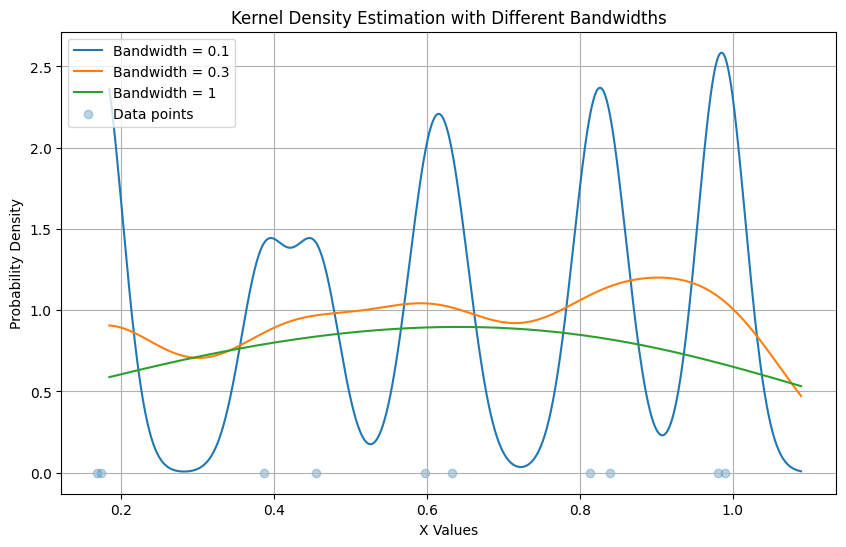

In [4]:
####################################### Using gausian_kde from scipy.stats
# importing the required pacakges
import numpy as np # for mathematical operations
import matplotlib.pyplot as plt # for plotting
from scipy.stats import gaussian_kde # for Kernel Density Estimation

# Defining the bandwidth
bandwidths = [0.1,0.3,1]

# Getting the x values
x_values = np.array(data_1[["x"]])

# Create a figure
plt.figure(figsize=(10, 6))

# Plot each estimated density
for bandwidth in bandwidths:
    # Fit the kernel density estimator
    kde = gaussian_kde(x_values.T, bw_method=bandwidth)
    
    # Defining lower and upper bounds for X Axis
    x_grid_lower = x_values.min() + x_values.min()*0.10
    x_grid_upper = x_values.max() + x_values.max()*0.10
    x_grid = np.linspace(x_grid_lower,x_grid_upper,1000)

    # Defining the Y Axis Points
    y_grid = kde(x_grid)

    # Plot estimated desities
    plt.plot(x_grid, y_grid, label=f'Bandwidth = {bandwidth}')
    
    # Estimate cumulative distribution function (CDF) value at x=0.7
    estimatedprobabilitydensity_value = kde(0.7)
    print(f'Bandwidth {bandwidth}: Estimated Probability Density value at x=0.7: {estimatedprobabilitydensity_value}')
    
# Plot data points
plt.scatter(x_values, np.zeros_like(x_values), alpha=0.3, label='Data points')

# Add title and legend
plt.title('Kernel Density Estimation with Different Bandwidths')
plt.xlabel('X Values')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

#### (b) Section b
Consider the 10 data points with both x and y values (i.e. bivariate data), and plot the
estimated 2-D density using the bandwidth of 0.3.

##### Solution

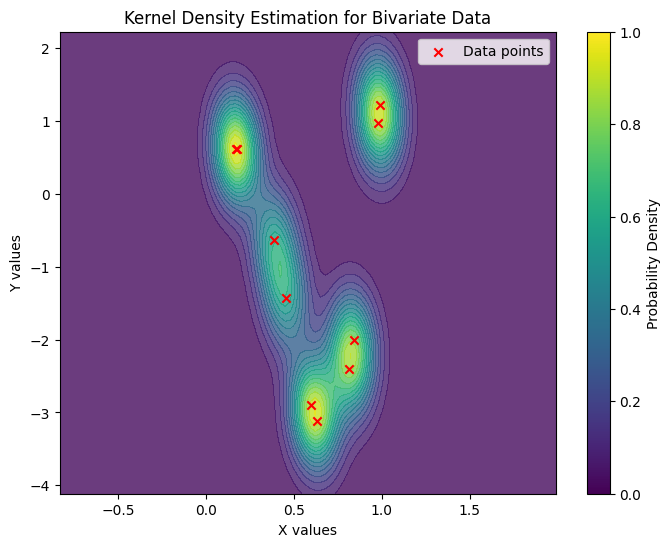

In [5]:
####################################### Using gausian_kde from scipy.stats
# importing the required pacakges
import numpy as np # for mathematical operations
import matplotlib.pyplot as plt # for plotting
from scipy.stats import gaussian_kde # for Kernel Density Estimation

# Fit the kernel density estimator to the bivariate data
kernel = gaussian_kde(data_1.values.T,bw_method=0.3)

# Create a grid for plotting the 2D density
x_min, x_max = data_1['x'].min() - 1, data_1['x'].max() + 1
y_min, y_max = data_1['y'].min() - 1, data_1['y'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Estimate the density on the grid
dens = kernel(grid_points.T)
dens = dens.reshape(xx.shape) # Reshape dens to match the shape of xx and yy

# Plot the estimated 2D density
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, dens, cmap='viridis', levels=20, alpha=0.8)
plt.scatter(data_1['x'], data_1['y'], c='red', marker='x', label='Data points')
plt.title('Kernel Density Estimation for Bivariate Data')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.colorbar(label='Probability Density')
plt.show()

### Problem 2
Given the above data set on input x and output y of 10 data examples. Hypothesize y is a polynomial
function of x, i.e. y = f(x). <br> Consider the following five hypotheses:<br>
• 2nd order polynomial<br>
• 3rd order polynomial<br>
• 4th order polynomial<br>
• 5th order polynomial<br>
• 6th order polynomial

#### (a) Section A
For each hypothesis, please define appropriate nonlinear basis function, and then use
multivariate linear regression method to determine the coefficients of the polynomial
function. Please use the analytic method (i.e. the one with matrix inversion) to solve each
of the multivariate linear regression problems directly. Next, use Ridge Regression (set δ2
= 0.005 for the weight of the L2 regularizer). Predict the value of y for x=0.7 in each case,
and make comparisons between different models obtained.

##### Solution
The nonlinear basis function i.e. ϕ(x) for the different given hypothesis can be given as :

| Hypothesis | ϕ(x) |
| --- | --- |
| $2^{nd}$ Order Polynomial | [$1,x,x^{2}$] |
| $3^{rd}$ Order Polynomial | [$1,x,x^{2},x^{3}$] |
| $4^{th}$ Order Polynomial | [$1,x,x^{2},x^{3},x^{4}$] |
| $5^{th}$ Order Polynomial | [$1,x,x^{2},x^{3},x^{4},x^{5}$] |
| $6^{th}$ Order Polynomial | [$1,x,x^{2},x^{3},x^{4},x^{5},x^{6}$] |

The general form for a multivariate linear regression model can be given as :<br>
y(x) = ϕ(x) * θ <br>
<br>
where, <br>
&emsp;ϕ(x)&emsp; = Non Linear Basis Function<br>
&emsp;θ&emsp; = Coeffients of the polynomial<br>
<br>
Therefore for our different hypothesis we can define the regression models as follows : <br>

| Hypothesis | ϕ(x) | y(x) |
| --- | --- | --- |
| $2^{nd}$ Order Polynomial | [$1,x,x^{2}$] | $θ_{0} + xθ_{1} + x^{2}θ_{2}$ |
| $3^{rd}$ Order Polynomial | [$1,x,x^{2},x^{3}$] | $θ_{0} + xθ_{1} + x^{2}θ_{2} + x^{3}θ_{3}$ |
| $4^{th}$ Order Polynomial | [$1,x,x^{2},x^{3},x^{4}$] | $θ_{0} + xθ_{1} + x^{2}θ_{2} + x^{3}θ_{3} + x^{4}θ_{4}$ |
| $5^{th}$ Order Polynomial | [$1,x,x^{2},x^{3},x^{4},x^{5}$] | $θ_{0} + xθ_{1} + x^{2}θ_{2} + x^{3}θ_{3} + x^{4}θ_{4} + x^{5}θ_{5}$ |
| $6^{th}$ Order Polynomial | [$1,x,x^{2},x^{3},x^{4},x^{5},x^{6}$] | $θ_{0} + xθ_{1} + x^{2}θ_{2} + x^{3}θ_{3} + x^{4}θ_{4} + x^{5}θ_{5} + x^{6}θ_{6}$ |

Now the general form of multivariate linear regression model can be given be modified as follows for finding the coefficients using analytical method:<br>
$y(x) = ϕ(x).θ$ <br>
Multiplying the transpose of ϕ(x) i.e. $ϕ(x)^{T}$ on both sides<br>
$y(x).ϕ(x)^{T} = ϕ(x).ϕ(x)^{T}.θ$ <br>
Rearranging the above to find θ we get <br>
$θ = (ϕ(x)^{T}.ϕ(x))^{-1}.ϕ(x)^{T}.y(x)$<br><br>
Therefore for a multivariate linear regression model can be given by<br><br>
$θ = (ϕ(x)^{T}.ϕ(x))^{-1}.ϕ(x)^{T}.y(x)$<br>

Now for Ridge Regression the above is modified and a L2 regulizer is added into the above form as follows<br>
$θ = (ϕ(x)^{T}.ϕ(x) + δ^{2}.I)^{-1}.ϕ(x)^{T}.y(x)$<br>

Now these can be solved as follows :

In [6]:
# importing the required packages
import numpy as np  # for mathematical operations
import pandas as pd  # for easy data manipulation

# Given data
x_values = data_1['x'].values
y_values = data_1['y'].values

# Creating the nonlinear basis function based on input values and order
def create_nonlinear_basis_function(x, order):
    basis_function = []
    for i in range(order + 1):
        basis_function.append(x**i)
    return np.array(basis_function).T

# Initialize a DataFrame to store results
results_df_a = pd.DataFrame(columns=['Order', 'Predicted @ x=0.7(MLR)', 'Predicted @ x=0.7(Ridge)'])

# Regularization parameter for Ridge Regression
delta_squared = 0.005

# Perform multivariate linear regression along with Ridge Regression for different polynomial orders
for order in range(2, 7):
    # Create the matrix X for the current order
    X = create_nonlinear_basis_function(x_values, order)

    # Calculate the coefficients using Multivariate Linear Regression
    beta_mlr = np.linalg.inv(X.T @ X) @ X.T @ y_values

    # Calculate the coefficients using Ridge Regression
    beta_ridge = np.linalg.inv(X.T @ X + delta_squared * np.identity(X.shape[1])) @ X.T @ y_values

    # Predict y for x=0.7 using Ridge Regression for the current order
    x_new = np.array([0.7**i for i in range(order + 1)])
    y_pred_mlr = x_new @ beta_mlr
    y_pred_ridge = x_new @ beta_ridge

    # Append results to DataFrame
    results_df_a = results_df_a._append({
        'Order': order,
        'Predicted @ x=0.7(MLR)': y_pred_mlr,
        'Predicted @ x=0.7(Ridge)': y_pred_ridge
    }, ignore_index=True)

# Print the results DataFrame
print(results_df_a)

   Order  Predicted @ x=0.7(MLR)  Predicted @ x=0.7(Ridge)
0    2.0               -2.396895                 -2.098049
1    3.0               -3.073891                 -2.530136
2    4.0               -3.168733                 -2.770058
3    5.0               -3.230295                 -2.871311
4    6.0               -3.227548                 -2.895369


C:\Users\af\AppData\Local\Temp\ipykernel_12828\3190477604.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df_a = results_df_a._append({


#### (b) Section B
Perform leave-one out cross validation (LOOCV) for the hypothesis of 4th order
polynomial. Use Ridge Regression for each problem. Calculate the cross validation error
for δ2 = 10-9, 10-8, 10-7, 10-6, 10-5, 10-4, 10-3 (seven cases). <br>
Choose the best δ2 according to cross-validation and report the final prediction at x=0.7. 

##### Solution

In [7]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# Given data
x_values = data_1['x'].values
y_values = data_1['y'].values

# Creating the nonlinear basis function based on input values and order
def create_nonlinear_basis_function(x, order):
    basis_function = []
    for i in range(order + 1):
        basis_function.append(x**i)
    return np.array(basis_function).T

# Creating 4th order polynomial
X = create_nonlinear_basis_function(x_values, 4)

# Values of delta squared to be tested
delta_squared_values = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]

# Initialize variables to store results
best_delta_squared = None
best_cross_val_error = float('inf')
results_df_b = pd.DataFrame(columns=['Delta Squared', 'Mean Cross Validation Error'])


# Perform LOOCV for each delta squared value
for delta_squared in delta_squared_values:
    cross_val_errors = []

    # Perform LOOCV
    for i in range(len(x_values)):
        # Exclude the i-th sample for validation
        X_train = np.delete(X, i, axis=0)
        Y_train = np.delete(y_values, i)

        # Train Ridge Regression model
        beta_ridge_cv = np.linalg.inv(X_train.T @ X_train + delta_squared * np.identity(X_train.shape[1])) @ X_train.T @ Y_train

        # Validate on the excluded sample
        x_validation = X[i, :]
        y_validation_pred = x_validation @ beta_ridge_cv

        # Calculate cross-validation error
        cross_val_error = (y_values[i] - y_validation_pred)**2
        cross_val_errors.append(cross_val_error)

    # Calculate mean cross-validation error for the current delta squared
    mean_cross_val_error = np.mean(cross_val_errors)

    # Update best delta squared if the current one is better
    if mean_cross_val_error < best_cross_val_error:
        best_cross_val_error = mean_cross_val_error
        best_delta_squared = delta_squared
        
    # Append results to DataFrame
    results_df_b = results_df_b._append({
        'Delta Squared': delta_squared,
        'Mean Cross Validation Error': mean_cross_val_error
    }, ignore_index=True)

print(results_df_b.sort_values(by='Mean Cross Validation Error'))

# Prediction at x=0.7 using best ridge results
# Train Ridge Regression model with the best delta squared
beta_ridge_best = np.linalg.inv(X.T @ X + best_delta_squared * np.identity(X.shape[1])) @ X.T @ y_values

# Predict y for x=0.7 using the model with the best delta squared
x_new_4th_order = np.array([0.7**i for i in range(5)])
y_pred_ridge_best = x_new_4th_order @ beta_ridge_best

# Print the best delta squared and final prediction at x=0.7
print("Best delta squared:", best_delta_squared)
print("Predicted y for x=0.7 (Ridge Regression - Best Delta):", y_pred_ridge_best)

   Delta Squared  Mean Cross Validation Error
2   1.000000e-07                     0.002363
1   1.000000e-08                     0.002586
0   1.000000e-09                     0.002616
3   1.000000e-06                     0.004819
4   1.000000e-05                     0.038794
5   1.000000e-04                     0.063029
6   1.000000e-03                     0.088213
Best delta squared: 1e-07
Predicted y for x=0.7 (Ridge Regression - Best Delta): -3.1656138760105783


C:\Users\af\AppData\Local\Temp\ipykernel_12828\1283073895.py:58: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df_b = results_df_b._append({


From the above we can see that the best Delta Square is $10^{-7}$ with a mean cross validation error of 0.002363<br>
Using this the predicted y is -3.1656138760105783 at x = 0.7

#### (c) Section C
What conclusions can you draw from the results?

##### Solution

From Section A we can see that 

In [8]:
print(results_df_a)

   Order  Predicted @ x=0.7(MLR)  Predicted @ x=0.7(Ridge)
0    2.0               -2.396895                 -2.098049
1    3.0               -3.073891                 -2.530136
2    4.0               -3.168733                 -2.770058
3    5.0               -3.230295                 -2.871311
4    6.0               -3.227548                 -2.895369


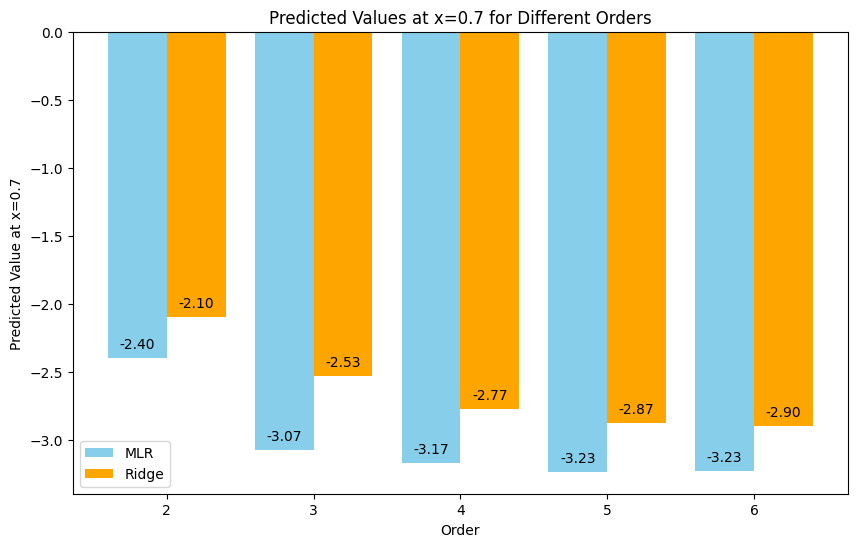

In [9]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(results_df_a['Order'] - 0.2, results_df_a['Predicted @ x=0.7(MLR)'], width=0.4, label='MLR', color='skyblue')
plt.bar(results_df_a['Order'] + 0.2, results_df_a['Predicted @ x=0.7(Ridge)'], width=0.4, label='Ridge', color='orange')

# Add data labels to the bars
for i, value in enumerate(results_df_a['Predicted @ x=0.7(MLR)']):
    plt.text(results_df_a['Order'][i] - 0.2, value + 0.05, f'{value:.2f}', ha='center', va='bottom')

for i, value in enumerate(results_df_a['Predicted @ x=0.7(Ridge)']):
    plt.text(results_df_a['Order'][i] + 0.2, value + 0.05, f'{value:.2f}', ha='center', va='bottom')

plt.xlabel('Order')
plt.ylabel('Predicted Value at x=0.7')
plt.title('Predicted Values at x=0.7 for Different Orders')
plt.legend()
plt.show()


From the above we can conclude the following:<br>
1. Comparison of MLR and Ridge Predictions:
- For each order, the predicted values using Ridge Regression are generally lower than those obtained using Multivariate Linear Regression.
- Ridge Regression introduces a regularization term that tends to shrink the coefficients, which can result in a more stable model but might lead to slightly lower predictions.<br>

2. Effect of Polynomial Order:
- As the polynomial order increases, both MLR and Ridge predictions decrease.
- Higher-order polynomials tend to capture more complex patterns in the data, but there is a risk of overfitting, especially in MLR. Ridge Regression, with its regularization term, can mitigate this risk to some extent.<br><br>

From the section b we can see that

In [10]:
print(results_df_b.sort_values(by='Mean Cross Validation Error'))

   Delta Squared  Mean Cross Validation Error
2   1.000000e-07                     0.002363
1   1.000000e-08                     0.002586
0   1.000000e-09                     0.002616
3   1.000000e-06                     0.004819
4   1.000000e-05                     0.038794
5   1.000000e-04                     0.063029
6   1.000000e-03                     0.088213


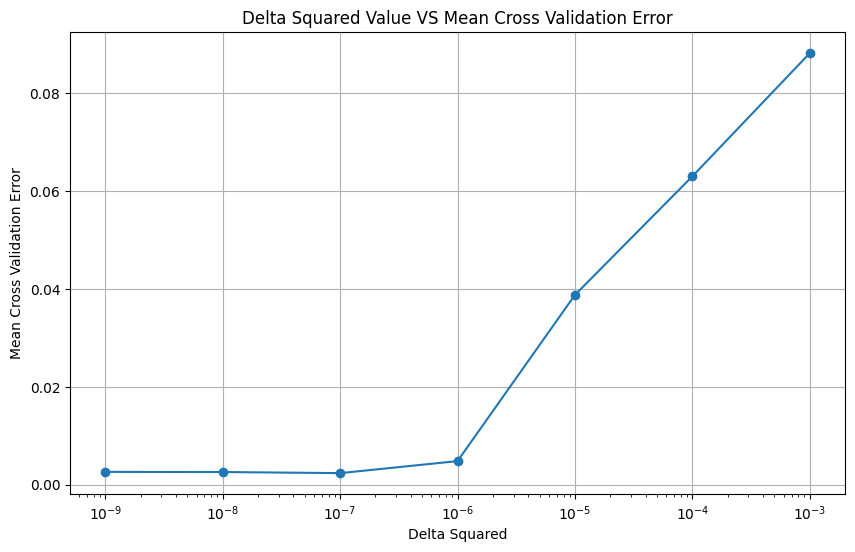

In [11]:
import matplotlib.pyplot as plt
# Plot raw results_df
plt.figure(figsize=(10, 6))
plt.plot(results_df_b['Delta Squared'], results_df_b['Mean Cross Validation Error'], marker='o', linestyle='-')
plt.xscale('log')  # Logarithmic scale for better visualization
plt.title('Delta Squared Value VS Mean Cross Validation Error')
plt.xlabel('Delta Squared')
plt.ylabel('Mean Cross Validation Error')
plt.grid(True)
plt.show()


From the above we can draw the following conclusions :<br>
1. Optimal Regularization Strength Range : The Mean Cross Validation Error is relatively low for the three smallest values of Delta Squared which implies that the optimal regularization strength lies in the range of 1.000000e-09 to 1.000000e-07.<br>
2. Sensitivity to Regularization: The Mean Cross Validation Error starts to increase as Delta Squared becomes larger (1.000000e-06 and above). This indicates that stronger regularization might lead to a reduction in cross-validation performance.
3. Overfitting Indication for higher values: The substantial increase in Mean Cross Validation Error for larger values of Delta Squared (1.000000e-05, 1.000000e-04, 1.000000e-03) suggests a risk of overfitting. Strong regularization can suppress the model's ability to fit the training data well, resulting in poor generalization to new data.

### Problem 3
(Please feel free to use any machine learning software package for this problem)
Consider the data set of Problem 2 (on regression). Please develop the following regression models
to predict the value of y for x=0.7.

##### Solution

In [12]:
# Data from problem set 2 
data_1

,x,y
0,0.1678,0.6097
1,0.1743,0.6100
2,0.3867,-0.6372
3,0.4555,-1.4296
4,0.5976,-2.9039
5,0.6332,-3.1160
6,0.8128,-2.4052
7,0.8401,-2.0088
8,0.9805,0.9767
9,0.9904,1.2236


In [13]:
# Importing required libararies
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import WhiteKernel
import matplotlib.pyplot as plt

In [14]:
# loading the data
# Given data
x_data = np.array(data_1[["x"]])
y_data = np.array(data_1[["y"]])

#### (a) Standard linear regression (using the hypothesis of 4th order polynomial)

Linear Regression Prediction (4th order polynomial) at x=0.7: [-3.1687335]


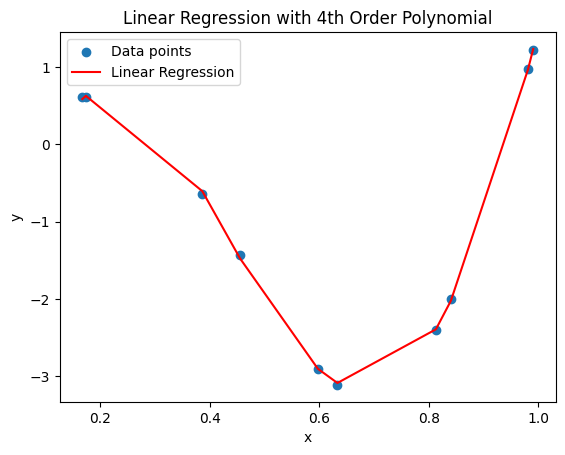

In [15]:
# Transform features to 4th order polynomial
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(x_data)

# Fit linear regression model
linear_reg = LinearRegression()
linear_reg.fit(x_poly, y_data)

# Predict y for x=0.7
x_predict = np.array([[0.7]])
x_predict_poly = poly.transform(x_predict)
y_predict_linear = linear_reg.predict(x_predict_poly)

print(f"Linear Regression Prediction (4th order polynomial) at x=0.7: {y_predict_linear[0]}")

# Visualize the regression curve
x_plot = x_data
x_plot_poly = poly.transform(x_plot)
y_plot_linear = linear_reg.predict(x_plot_poly)

plt.scatter(x_data, y_data, label='Data points')
plt.plot(x_data, y_plot_linear, color='red', label='Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with 4th Order Polynomial')
plt.legend()
plt.show()

#### (b) Gaussian process

Gaussian Process Regression Prediction at x=0.7: -3.2292928449846663


c:\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


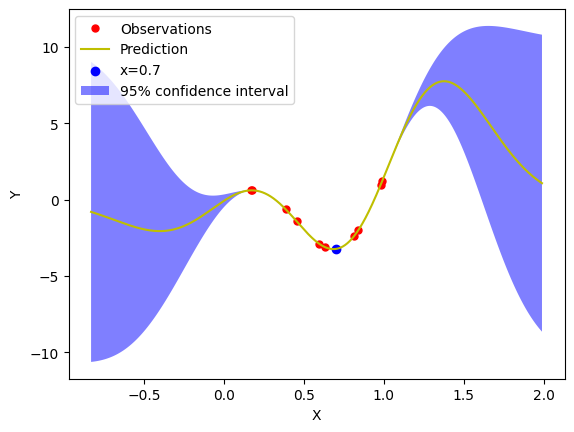

In [16]:
# Define the Gaussian Process kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)) + WhiteKernel() # Adding Whitekernel to model the noise component

# Fit Gaussian Process Regression model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=0)
gp.fit(x_data, y_data)

# Predict y for x=0.7
x_predict = np.array([[0.7]])
y_predict_gp, sigma = gp.predict(x_predict, return_std=True)

print(f"Gaussian Process Regression Prediction at x=0.7: {y_predict_gp[0]}")

# Plotting the model
x = np.linspace(np.min(x_data) - 1, np.max(x_data) + 1, 1000)
y_pred, sigma = gp.predict(x.reshape(-1, 1), return_std=True)

plt.figure()
plt.plot(x_data, y_data, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'y-', label='Prediction')
plt.scatter(x_predict, y_predict_gp, color="blue", label="x=0.7")
plt.fill_between(x, y_pred - 1.9600 * sigma, y_pred + 1.9600 * sigma, alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper left')
plt.show()

### Problem 4
A dataset of housing prices in Portland, Oregon is given in the table below. The inputs {x x 1 2 , } are
the living area and the number of bedrooms, and the output y to be predicted is the price. There
are m=47 input-output data sample pairs { } 1 ( ), ( ) m
k k yk = x in total. Please first scale two inputs by
their standard deviations and set their means to zero. Next, add a constant term 0 x =1 to the input.
The cost function to be minimized is given by
and thus the gradient updating rule is given by:
where α denotes the learning rate / step size. Initialize the parameter to θ = 0 , and carry out
gradient descent for about 50 iterations with learning rates set as 0.01, 0.03, 0.1, 0.3, 1, 1.2,
respectively. Plot the values of J (θ) during iterations for different learning rates on the SAME
graph. Please implement the gradient descent algorithm, instead of solving the quadratic program
directly

##### Solution

In [32]:
initial_theta = np.zeros(X.shape[1])
initial_theta 

array([0., 0., 0.])

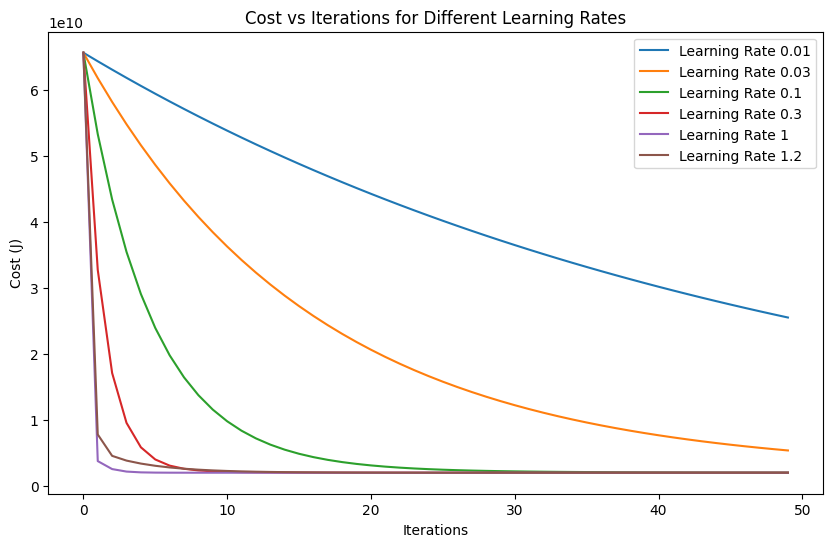

In [30]:
import numpy as np

# Given data
data = pd.read_csv('data/data_4.csv')
# Extracting features and target variable
X = data[['x1','x2']]  # Features
y = data['y']   # Target variable

# Scaling the input feature by scaling the inputs with their standard deviationa and then setting the mean to zero
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Adding x0 = 1 to the input matirz
X = np.insert(X, 0, 1, axis=1)

# Initialize parameters
initial_theta = np.zeros(X.shape[1])

# Different learning rates (alpha)
learning_rates = [0.01, 0.03, 0.1, 0.3, 1, 1.2]

# Number of iterations
num_iterations = 50

# Plotting
plt.figure(figsize=(10, 6))

for alpha in learning_rates:
    # Copy initial parameters to avoid overwriting
    theta = initial_theta.copy()
    
    # Lists to store cost values for each iteration
    cost_history = []

    # Gradient Descent
    for iteration in range(num_iterations):
        # Compute predictions
        predictions = X.dot(theta)

        # Compute errors
        errors = predictions - y

        # Compute gradients
        gradients = (1/len(y)) * X.T.dot(errors)

        # Update parameters
        theta = theta - alpha * gradients

        # Compute cost for monitoring convergence (optional)
        cost = (1/(2*len(y))) * np.sum(errors**2)
        cost_history.append(cost)

    # Plot the cost history for the current learning rate
    plt.plot(range(num_iterations), cost_history, label=f'Learning Rate {alpha}')

plt.title('Cost vs Iterations for Different Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('Cost (J)')
plt.legend()
plt.show()